In [1]:
using Revise
using PyPlot
using StaticArrays, SchwarzChristoffelDisk

[ Info: Precompiling SchwarzChristoffelDisk [e6814d44-013b-435f-9487-308d62823705] (cache misses: include_dependency fsize change (2), mismatched flags (16))

SYSTEM: caught exception of type :MethodError while trying to print a failed Task notice; giving up


In [2]:
classify_symmetry(p::Polygon) = SchwarzChristoffelDisk.classify_symmetry(p.w, p.β, p.ℓ)

ϕ = acos(1/sqrt(5))/π
κ = sqrt(5)
;

In [3]:
circshift_poly(p::Polygon{N}, k) where {N} = Polygon(
    SVector{N}(ntuple(i -> p.w[mod1(i - k, N)], N)),
    p.s,
    SVector{N}(ntuple(i -> p.β[mod1(i - k, N)], N)),
    SVector{N}(ntuple(i -> p.ℓ[mod1(i - k, N)], N)),
)

circshift_poly (generic function with 1 method)

# Polygon consturctors

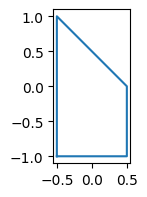

In [5]:
# NoSymmetry (finite)
poly = Polygon(SA[-0.5-1im, 0.5-1im, 0.5, -0.5+1im])
@assert all(poly.β .== [0.5, 0.5, 0.25, 0.75])
@assert all(poly.ℓ .== [1, 1, sqrt(2), 2])
@assert poly.s isa NoSymmetry
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) == 1

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

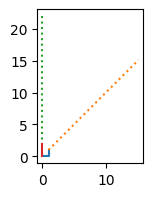

In [ ]:

# NoSymmetry (infinite)
poly = Polygon(SA[0, 1, 1+1im, Inf, 2im], Dict(3 => -0.25, 4 => 1.25, 5 => 0))
@assert all(poly.β .== [0.5, 0.5, -0.25, 1.25, 0])
@assert all(poly.ℓ .== [1, 1, Inf, Inf, 2])
@assert poly.s isa NoSymmetry
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) == 1

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

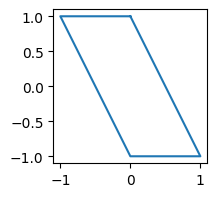

In [ ]:

# CyclicSymmetry (finite)
poly = Polygon(SA[1im, -1+1im], CyclicSymmetry{2}())
@assert all(poly.β .== [ϕ, 1-ϕ, ϕ, 1-ϕ])
@assert all(poly.ℓ .== [1, κ, 1, κ])
@assert poly.s isa CyclicSymmetry{2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) == 1

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

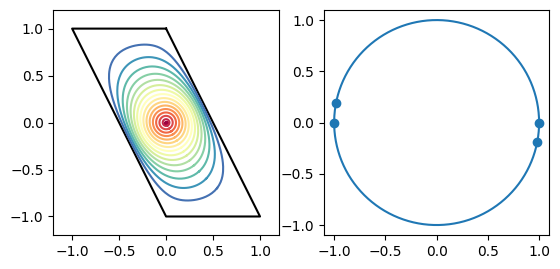

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-2.7301056318049666]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [ ]:
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

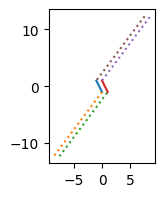

In [ ]:

# CyclicSymmetry (infinite)
poly = Polygon(SA[1im, Inf, -1+1im], CyclicSymmetry{2}(), Dict(1 => -ϕ, 3 => ϕ))
@assert all(poly.β .== [-ϕ, 1, ϕ, -ϕ, 1, ϕ])
@assert all(poly.ℓ .== [Inf, Inf, sqrt(5), Inf, Inf, sqrt(5)])
@assert poly.s isa CyclicSymmetry{2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) == 2

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;


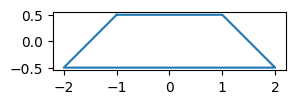

In [ ]:

# BilateralSymmetry{0} (finite)
poly = Polygon(SA[-1+0.5im, -2-0.5im], BilateralSymmetry{0}(1.0im))
@assert all(poly.β .== [0.25, 0.75, 0.75, 0.25])
@assert all(poly.ℓ .== [sqrt(2), 4, sqrt(2), 2])
@assert poly.s isa BilateralSymmetry{0}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [2, 4]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

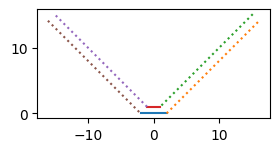

In [ ]:

# BilateralSymmetry{0} (infinite)
poly = Polygon(
    SA[-1+1im, Inf, -2],
    BilateralSymmetry{0}(1im),
    Dict(1 => -0.25, 3 => 0.25),
)
@assert all(poly.β .== [-0.25, 1, 0.25, 0.25, 1, -0.25])
@assert all(poly.ℓ .== [Inf, Inf, 4, Inf, Inf, 2])
@assert poly.s isa BilateralSymmetry{0}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [2, 5]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

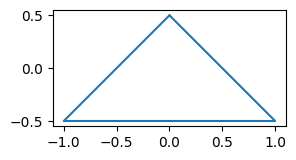

In [ ]:
# BilateralSymmetry{1} (finite)
poly = Polygon(SA[0.5im, -1-0.5im], BilateralSymmetry{1}(1im))
@assert all(poly.β .== [0.5, 0.75, 0.75])
@assert all(poly.ℓ .== [sqrt(2), 2, sqrt(2)])
@assert poly.s isa BilateralSymmetry{1}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [2, 4]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

(idx₁, num_indep, num_free, num_infs, poly.w[idx₁]) = (1, 2, 1, 0, 0.0 + 0.5im)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(1, Int64[], [1])


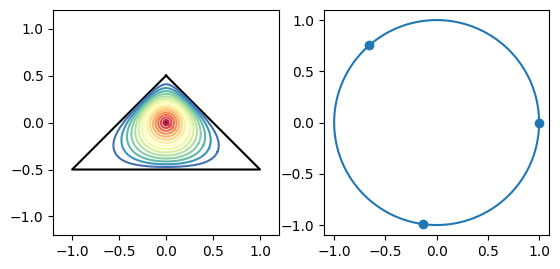

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-0.2919241911434112]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [ ]:
poly_nosym = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
poly_rotated(k) = begin
        N = length(poly.w)
        Polygon(SVector(ntuple(i -> poly.w[mod1(i - k, N)], N)),
                poly.s,
                SVector(ntuple(i -> poly.β[mod1(i - k, N)], N)),
                SVector(ntuple(i -> poly.ℓ[mod1(i - k, N)], N)))
end
res, scderiv = sc_parameter_problem(poly_rotated(0))
sc_plot(scderiv, 15, 500, "Spectral", false)
res

## k+1 works, k doesn't

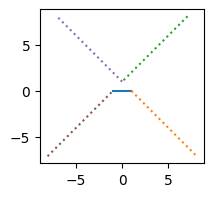

In [ ]:
# BilateralSymmetry{1} (infinity not on axis)
poly = Polygon(
    SA[1im, Inf, -1],
    BilateralSymmetry{1}(1im),
    Dict(1 => -0.5, 3 => -0.25),
)
@assert all(poly.β .== [-0.5, 1.5, -0.25, -0.25, 1.5])
@assert all(poly.ℓ .== [Inf, Inf, 2, Inf, Inf])
@assert poly.s isa BilateralSymmetry{1}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) == 2

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

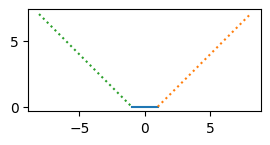

In [ ]:
# BilateralSymmetry{1} (infinity on axis)
poly = Polygon(SA[Inf, -1], BilateralSymmetry{1}(1im), Dict(2 => 0.25))
@assert all(poly.β .== [1.5, 0.25, 0.25])
@assert all(poly.ℓ .== [Inf, 2, Inf])
@assert poly.s isa BilateralSymmetry{1}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) == 2

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

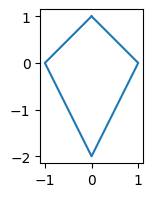

0

In [ ]:
# BilateralSymmetry{2} (finite)
poly = Polygon(SA[1im, -1, -2im], BilateralSymmetry{2}(1im))
@assert all(poly.β .== [0.5, 0.75-ϕ, 2ϕ, 0.75-ϕ])
@assert all(poly.ℓ .== [sqrt(2), sqrt(5), sqrt(5), sqrt(2)])
@assert poly.s isa BilateralSymmetry{2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 3]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

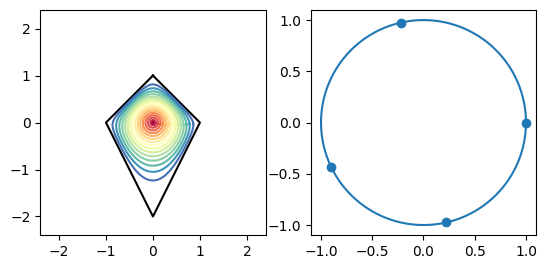

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [0.28653121987889973]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [201]:
poly_nosym = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
poly_rotated(k) = begin
        N = length(poly.w)
        Polygon(SVector(ntuple(i -> poly.w[mod1(i - k, N)], N)),
                poly.s,
                SVector(ntuple(i -> poly.β[mod1(i - k, N)], N)),
                SVector(ntuple(i -> poly.ℓ[mod1(i - k, N)], N)))
end
res, scderiv = sc_parameter_problem(poly_rotated(0))
sc_plot(scderiv, 15, 500, "Spectral", false)
res

## k+1 doesn't work, k works

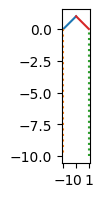

1

In [ ]:
# BilateralSymmetry{2} (one infinity on axis)
poly = Polygon(SA[1im, -1, Inf], BilateralSymmetry{2}(1im), Dict(2 => 0.25))
@assert all(poly.β .== [0.5, 0.25, 1, 0.25])
@assert all(poly.ℓ .== [sqrt(2), Inf, Inf, sqrt(2)])
@assert poly.s isa BilateralSymmetry{2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 3]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;
SchwarzChristoffelDisk.ProblemIndices(poly)

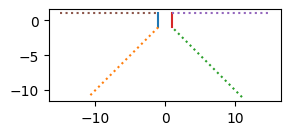

SchwarzChristoffelDisk.ProblemIndices{2, 1}(2, [3, 5], [5])

In [20]:
# BilateralSymmetry{2} (both infinities on axis)
poly = Polygon(
    SA[Inf, -1+1im, -1-1im, Inf],
    BilateralSymmetry{2}(1im),
    Dict(1 => 2, 2 => -0.5, 3 => -0.25),
)
@assert all(poly.β .== [2, -0.5, -0.25, 1.5, -0.25, -0.5])
@assert all(poly.ℓ .== [Inf, 2, Inf, Inf, 2, Inf])
@assert poly.s isa BilateralSymmetry{2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 4]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;
SchwarzChristoffelDisk.ProblemIndices(Polygon(poly.w,NoSymmetry(),poly.β,poly.ℓ))


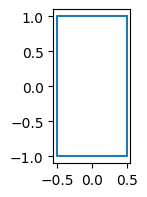

In [101]:
# DihedralSymmetry{2,0} (finite)
poly = Polygon(SA[0.5+1im], DihedralSymmetry{2,0}(1im))
@assert all(poly.β .== [0.5, 0.5, 0.5, 0.5])
@assert all(poly.ℓ .== [1, 2, 1, 2])
@assert poly.s isa DihedralSymmetry{2,0}
@assert poly.s == classify_symmetry(poly)

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

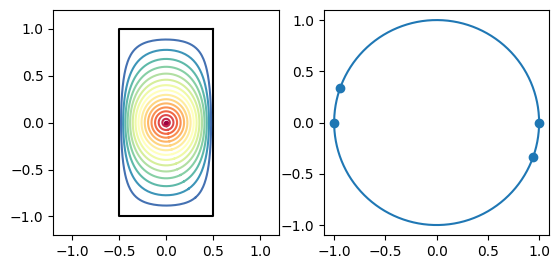

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-2.09309477204759]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [102]:
poly_nosym = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

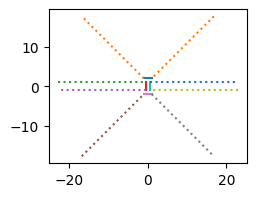

SchwarzChristoffelDisk.ProblemIndices{4, 3}(3, [4, 6, 9, 12], [6, 9, 12])

In [21]:
# DihedralSymmetry{2,0} (infinite)
poly = Polygon(SA[0.5+1im, Inf, 1+2im], DihedralSymmetry{2,0}(-1im), Dict(1 => -0.5, 2 => 1.25, 3 => -0.25))
@assert all(poly.β .== [-0.5, 1.25, -0.25, -0.25, 1.25, -0.5, -0.5, 1.25, -0.25, -0.25, 1.25, -0.5])
@assert all(poly.ℓ .== [Inf, Inf, 2, Inf, Inf, 2, Inf, Inf, 2, Inf, Inf, 2])
@assert poly.s isa DihedralSymmetry{2,0}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 4, 7, 10]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;
SchwarzChristoffelDisk.ProblemIndices(Polygon(poly.w,NoSymmetry(),poly.β,poly.ℓ))

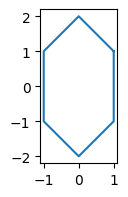

In [32]:
# DihedralSymmetry{2,1} (finite)
poly = Polygon(SA[1+1im, 2im], DihedralSymmetry{2,1}(1im))
@assert all(poly.β .== [0.25, 0.5, 0.25, 0.25, 0.5, 0.25])
@assert all(poly.ℓ .== [sqrt(2), sqrt(2), 2, sqrt(2), sqrt(2), 2])
@assert poly.s isa DihedralSymmetry{2,1}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 2, 4, 5]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

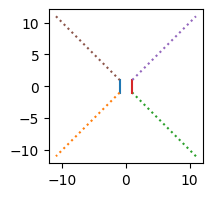

SchwarzChristoffelDisk.ProblemIndices{2, 1}(3, [4, 6], [6])

In [22]:
# DihedralSymmetry{2,1} (infinite)
poly = Polygon(SA[1+1im, Inf], DihedralSymmetry{2,1}(1im), Dict(1 => -0.25))
@assert all(poly.β .== [-0.25, 1.5, -0.25, -0.25, 1.5, -0.25])
@assert all(poly.ℓ .== [Inf, Inf, 2, Inf, Inf, 2])
@assert poly.s isa DihedralSymmetry{2,1}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 2, 4, 5]

(fig, ax) = subplots(figsize=(3,2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;
SchwarzChristoffelDisk.ProblemIndices(Polygon(poly.w,NoSymmetry(),poly.β,poly.ℓ))

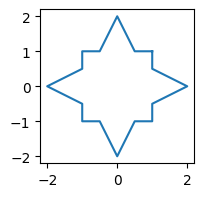

In [34]:
# DihedralSymmetry{4,2} (finite)
poly = Polygon(SA[1+1im, 0.5+1im, 2im], DihedralSymmetry{4,2}(2im))
@assert all(poly.β .== [0.5, -ϕ, 2ϕ, -ϕ, 0.5, -ϕ, 2ϕ, -ϕ, 0.5, -ϕ, 2ϕ, -ϕ, 0.5, -ϕ, 2ϕ, -ϕ])
@assert all(poly.ℓ .== [1, κ, κ, 1, 1, κ, κ, 1, 1, κ, κ, 1, 1, κ, κ, 1] / 2)
@assert poly.s isa DihedralSymmetry{4,2}
@assert poly.s == classify_symmetry(poly)
@assert isodd(first_independent_vertex(poly))

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;


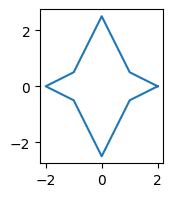

In [104]:
# DihedralSymmetry{2,2} (finite)
poly = Polygon(SA[2, 1+0.5im, 2.5im], DihedralSymmetry{2,2}(2im))
@assert all(poly.β .≈ [2ϕ, 0.5-2ϕ, 2ϕ, 0.5-2ϕ, 2ϕ, 0.5-2ϕ, 2ϕ, 0.5-2ϕ])
@assert all(poly.ℓ .== [κ/2, κ, κ, κ/2, κ/2, κ, κ, κ/2])
@assert poly.s isa DihedralSymmetry{2,2}
@assert poly.s == classify_symmetry(poly)
@assert isodd(first_independent_vertex(poly))

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

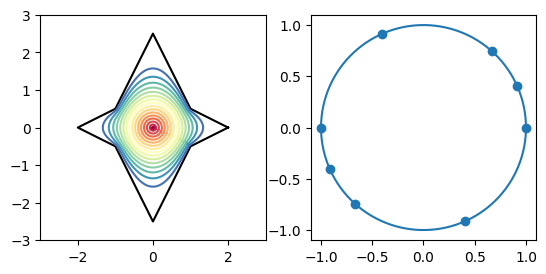

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [1.0129538932027808]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [105]:
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

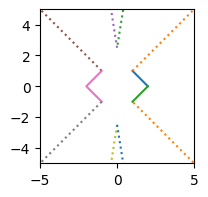

SchwarzChristoffelDisk.ProblemIndices{4, 3}(1, [2, 4, 6, 10], [6, 7, 12])

In [23]:
# DihedralSymmetry{2,2} (infinite, infinities not on axes)
poly = Polygon(
    SA[2, 1+1im, Inf, 2.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(2 => -0.5, 4 => -0.9),
)
@assert all(poly.β .≈ [0.5, -0.5, 1.2, -0.9, 1.2, -0.5, 0.5, -0.5, 1.2, -0.9, 1.2, -0.5])
@assert all(poly.ℓ .== [sqrt(2), Inf, Inf, Inf, Inf, sqrt(2), sqrt(2), Inf, Inf, Inf, Inf, sqrt(2)])
@assert poly.s isa DihedralSymmetry{2,2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 4, 7, 10]

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
ax.set_ylim((-5,5))
ax.set_xlim((-5,5))
;

SchwarzChristoffelDisk.ProblemIndices(Polygon(poly.w,NoSymmetry(),poly.β,poly.ℓ))

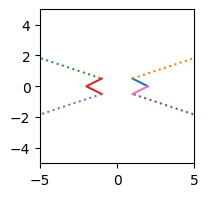

SchwarzChristoffelDisk.ProblemIndices{2, 3}(1, [2, 4], [4, 5, 8])

In [24]:
# DihedralSymmetry{2,2} (infinite, infinity on one axis)
poly = Polygon(SA[2, 1+0.5im, Inf], DihedralSymmetry{2,2}(2im), Dict(2 => -0.75))
@assert all(poly.β .≈ [2ϕ, -0.75, 2.5-2ϕ, -0.75, 2ϕ, -0.75, 2.5-2ϕ, -0.75])
@assert all(poly.ℓ .== [κ/2, Inf, Inf, κ/2, κ/2, Inf, Inf, κ/2])
@assert poly.s isa DihedralSymmetry{2,2}
@assert poly.s == classify_symmetry(poly)
@assert isodd(first_independent_vertex(poly))

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
ax.set_ylim((-5,5))
ax.set_xlim((-5,5))
;
SchwarzChristoffelDisk.ProblemIndices(Polygon(poly.w,NoSymmetry(),poly.β,poly.ℓ))

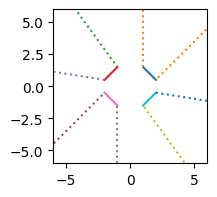

SchwarzChristoffelDisk.ProblemIndices{4, 3}(2, [3, 5, 8, 11], [11, 8, 5])

In [11]:
# DihedralSymmetry{2,2} (infinite, infinities on both axes)
poly = Polygon(SA[Inf, 2+0.5im, 1+1.5im, Inf], DihedralSymmetry{2,2}(2im), Dict(2 => -0.5, 3 => -0.25, 4 => 1.2))
@assert all(
    poly.β .== [1.3, -0.5, -0.25, 1.2, -0.25, -0.5, 1.3, -0.5, -0.25, 1.2, -0.25, -0.5],
)
@assert all(
    poly.ℓ .==
    [Inf, sqrt(2), Inf, Inf, sqrt(2), Inf, Inf, sqrt(2), Inf, Inf, sqrt(2), Inf],
)
@assert poly.s isa DihedralSymmetry{2,2}
@assert poly.s == classify_symmetry(poly)
@assert first_independent_vertex(poly) ∈ [1, 4, 7, 10]

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
ax.set_xlim((-6,6))
ax.set_ylim((-6,6))
# Looks like plotting is broken!
;
SchwarzChristoffelDisk.ProblemIndices(Polygon(poly.w,NoSymmetry(),poly.β,poly.ℓ))

sym = CyclicSymmetry{2}()


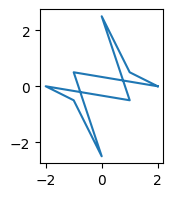

In [ ]:
# test for axis on right hand side of base
# DihedralSymmetry{2,2} (finite)
poly = Polygon(SA[2, 1+0.5im, 2.5im], DihedralSymmetry{2,2}(2+0im))
@assert poly.s isa DihedralSymmetry{2,2}
sym = classify_symmetry(poly)
@show sym

(fig, ax) = subplots(figsize = (3, 2))
draw_polygon(poly, ax)
ax.set_aspect("equal")
;

# Forward transform

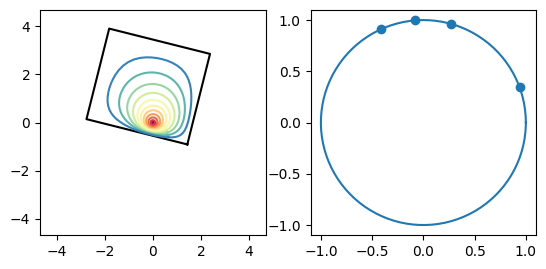

4-element SizedVector{4, ComplexF64, Vector{ComplexF64}} with indices SOneTo(4):
 1.4330497514354936 - 0.9090163889198571im
  2.376328764283067 + 2.852979370053513im
 -1.813565611580593 + 3.9035491852245605im
 -2.756844478122157 + 0.14155320287751874im

In [106]:
pv = SchwarzChristoffelDisk.prevertices(
    MVector{2}(1, 0),
    BilateralSymmetry{0}(complex(0,1)),
    0
)
pβ = SA[1//2, 1//2, 1//2, 1//2]
scderiv = SchwarzChristoffel(pv, pβ)
sc_plot(scderiv, 10, 200, "Spectral", false)
[sc_trafo(scderiv, z) for z ∈ scderiv.z]

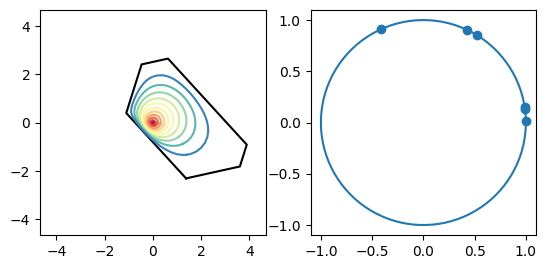

6-element SizedVector{6, ComplexF64, Vector{ComplexF64}} with indices SOneTo(6):
    1.377630030153804 - 2.3132172053688276im
    3.606226576280783 - 1.8204743238860883im
    3.891667653426324 - 0.9169569293498926im
   0.6274559123576473 + 2.6493612961423643im
 -0.46426173955841865 + 2.4079824498916462im
  -1.1004546563435706 + 0.3942170322373289im

In [107]:
pv = SchwarzChristoffelDisk.prevertices(
    MVector{3}(2.0, -4.0, 2.0),
    BilateralSymmetry{0}(complex(0,1)),
    0
)
pβ = SA[1//3, 1//3, 1//3, 1//3, 1//3, 1//3]
scderiv = SchwarzChristoffel(pv, pβ)
sc_plot(scderiv, 10, 200, "Spectral", false)
[sc_trafo(scderiv, z) for z ∈ scderiv.z]

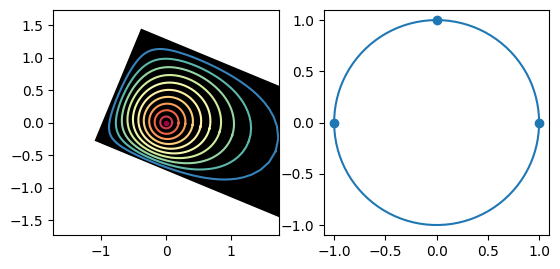

In [83]:
scderiv = SchwarzChristoffel(SA[0, π/2, π], SA[1, 1/2, 1/2])
sc_plot(scderiv, 10, 200, "Spectral", true)

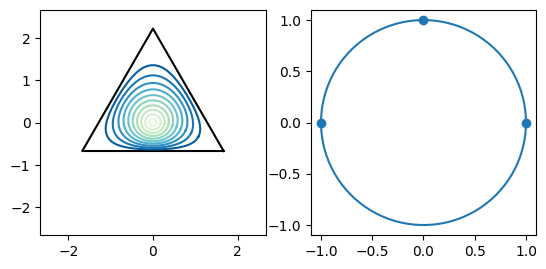

In [87]:
scderiv = SchwarzChristoffel(SA[0, π/2, π], SA[2/3, 2/3, 2/3])
sc_plot(scderiv, 10, 200, "GnBu")

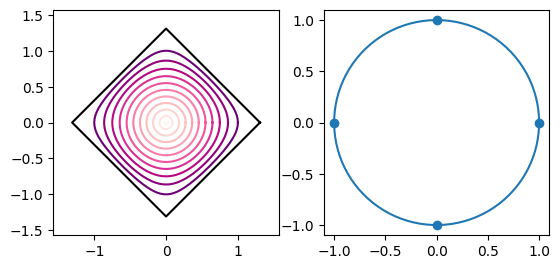

In [86]:
scderiv = SchwarzChristoffel(SA[0, π/2, π, 3π/2], SA[1/2, 1/2, 1/2, 1/2])
sc_plot(scderiv, 10, 200, "RdPu")

# Parameter problem

### NoSymmetry

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 1, [2], [2])


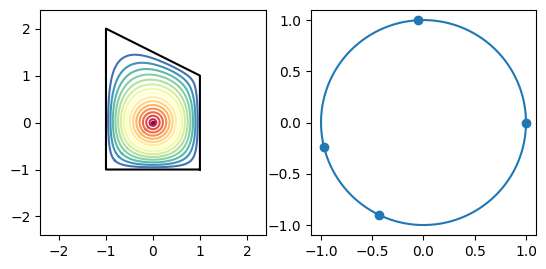

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-0.08631916058954468, 0.6999133274011009, -0.8337245416102765]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [338]:
poly = Polygon(SA[-1-1im, 1-1im, 1+1im, -1+2im])

res, scderiv = sc_parameter_problem(circshift_poly(poly,3))
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = NoSymmetry()
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 1, [2], [2, 3])


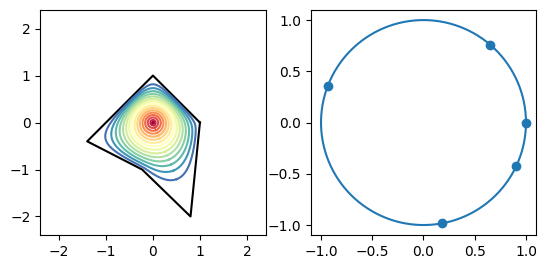

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.8025353774044033, -0.10197605030018936, 0.8064603394190549, 0.7613131828168312]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [339]:
poly = Polygon(SA[1.0, 1.0im, complex(-1.4, -0.4), complex(-0.23, -1), complex(0.8, -2)])
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

### CyclicSymmetry

poly.s = CyclicSymmetry{3}()
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 1, [2], [2])


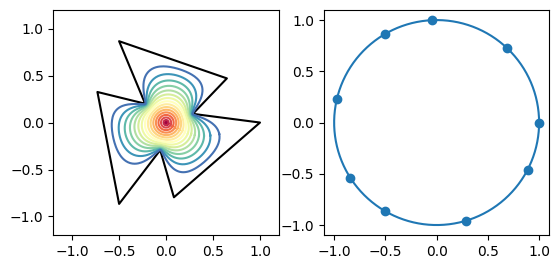

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [0.004079514642489882, 0.5265640208171543, -0.5306427069349613]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [340]:
poly = Polygon(SA[1, 0.3*cispi(0.1), 0.8*cispi(0.2)], CyclicSymmetry{3}())
@show poly.s
poly = circshift_poly(poly, -1)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = CyclicSymmetry{2}()
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 1, Int64[], [1])


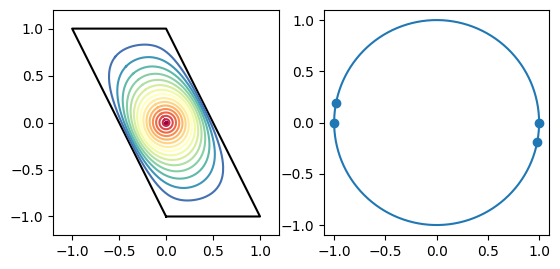

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-2.730105006004037]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [343]:
poly = Polygon(SA[1im, -1+1im], CyclicSymmetry{2}())
@show poly.s
poly = circshift_poly(poly, 2)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = CyclicSymmetry{3}()
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 1, [2], [2, 3])


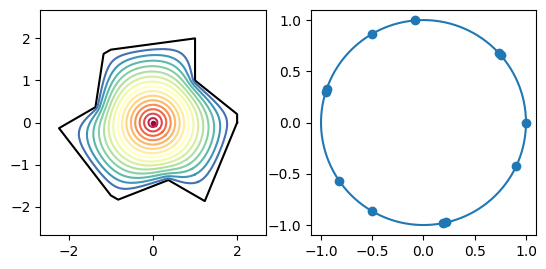

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [3.056089816318644, -3.2957550034320433, 0.7296438942045099, -0.4899787318411449]
 * Inf-norm of residuals: 0.000000
 * Iterations: 9
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 10
 * Jacobian Calls (df/dx): 10

In [344]:
poly = Polygon(SA[2, 2+0.2im, 1+1im, 1+2im], CyclicSymmetry{3}())
@show poly.s
poly = circshift_poly(poly, 0)
poly_nosym = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

### DihedralSymmetry no Infinities

poly.s = DihedralSymmetry{2, 0, Complex{Int64}}(1 + 2im)
num_infs = 0
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 1, Int64[], [1])


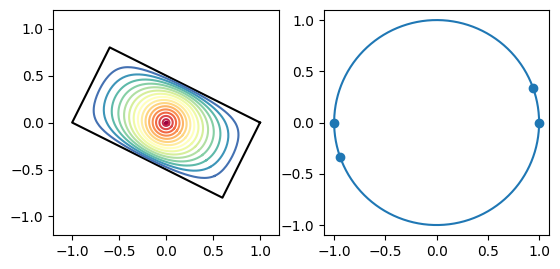

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [2.0930932510448796]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [39]:
poly = Polygon(SA[1], DihedralSymmetry{2,0}(1+2im))
@show poly.s
poly = circshift_poly(poly, 0)
# poly_nosym = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

In [658]:
fp = SchwarzChristoffelDisk.free_params(poly)
SchwarzChristoffelDisk.circshift_noalloc_poplast(
    SchwarzChristoffelDisk.prevertex_params(MVector{length(fp)}(1:length(fp)), poly.s), 0)

8-element MVector{8, Int64} with indices SOneTo(8):
 1
 2
 3
 1
 2
 3
 1
 2

### BilateralSymmetry

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(3, 4, [5], [5, 6])


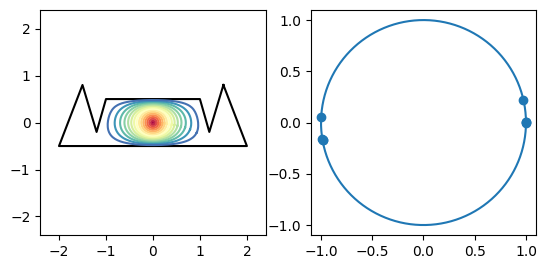

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [2.5818369869672333, 3.347998449493682, 2.292969584221139, -8.25868165619352]
 * Inf-norm of residuals: 0.000000
 * Iterations: 9
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 10
 * Jacobian Calls (df/dx): 10

In [25]:
# BilateralSymmetry{0}
poly = Polygon(SA[-1+0.5im, -1.2-0.2im, -1.5+0.8im, -2-0.5im], BilateralSymmetry{0}(1.0im))
poly = circshift_poly(poly, 3)
# poly_nosym = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

# kN is the first_independent_vertex `idx₁`
# therefore, shift = (idx₁ - 1)

In [45]:
num_independent_vertices(poly)

4

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 2, [3], [3])


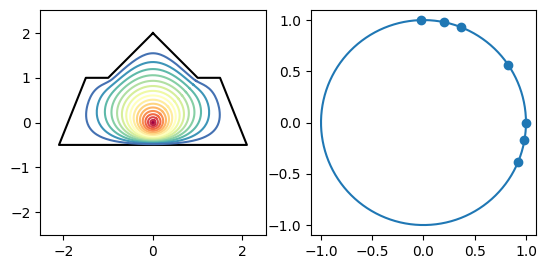

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [1.2561477311075198, -0.2785446909378259, -2.9453272179090013]
 * Inf-norm of residuals: 0.000000
 * Iterations: 7
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 8

In [28]:
# BilateralSymmetry{1}
poly = Polygon(SA[2im, -1+1im, -1.5+1im, -2.1-0.5im], BilateralSymmetry{1}(1im))
poly = circshift_poly(poly, 0)
poly_nosym = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

# kN is idx₁ + 1, because the vertex on the axis can be inferred from the intersection
# of the sides coming off the neighbouring vertices (given β)
# the shift is therefore kN - 2

In [423]:
fp = SchwarzChristoffelDisk.free_params(poly)
SchwarzChristoffelDisk.circshift_noalloc_poplast(
    SchwarzChristoffelDisk.prevertex_params(MVector{length(fp)}(1:length(fp)), poly.s), 1)

6-element MVector{6, Int64} with indices SOneTo(6):
 -1
  0
  1
  2
  3
 -3

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(2, 4, [5], [5])


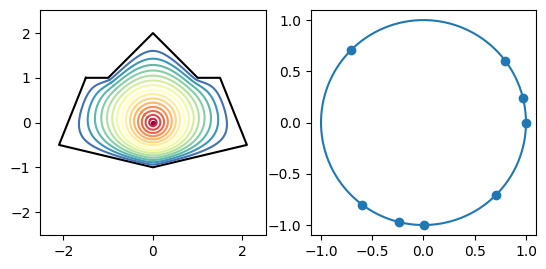

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [1.4510060858074265, 0.5016122502377778, -1.1730289499042679]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [31]:
# BilateralSymmetry{2}
poly = Polygon(SA[2im, -1+1im, -1.5+1im, -2.1-0.5im, -1im], BilateralSymmetry{2}(1im))
poly = circshift_poly(poly, 6)
poly_nosym = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res


In [449]:
fp = SchwarzChristoffelDisk.free_params(poly)
SchwarzChristoffelDisk.circshift_noalloc_poplast(
    SchwarzChristoffelDisk.prevertex_params(MVector{length(fp)}(1:length(fp)), poly.s), 0)

7-element MVector{7, Int64} with indices SOneTo(7):
  0
  1
  2
  3
  0
 -3
 -2

poly.s = BilateralSymmetry{1, ComplexF64}(0.0 + 1.0im)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(2, 1, Int64[], [1])
  0.697275 seconds (2.73 M allocations: 130.937 MiB, 99.65% compilation time)


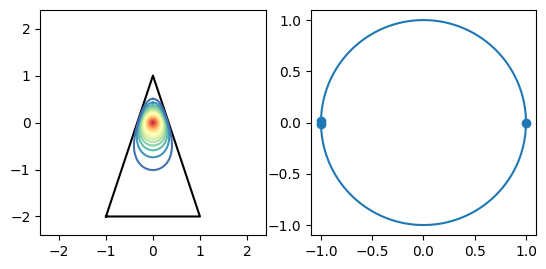

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [4.496561427431225]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [48]:
poly = Polygon(SA[complex(-1, -2), complex(1, -2), 1.0im])
@show poly.s
@time res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = BilateralSymmetry{1, ComplexF64}(0.0 + 0.9999999999999999im)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(2, Int64[], [2])
  0.000901 seconds (805 allocations: 31.438 KiB)


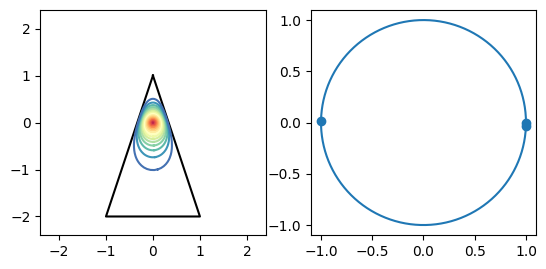

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [4.496561427431219]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [24]:
poly = Polygon(SA[1.0im, -1-2im, 1-2im])
poly = circshift_poly(poly, 0)
@show poly.s
@time res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = DihedralSymmetry{2, 1, Complex{Int64}}(0 + 1im)
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(4, 6, [7], [7])
  0.012243 seconds (7.79 k allocations: 428.359 KiB)


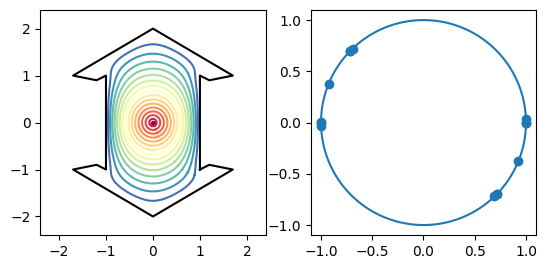

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [4.616203162350042, -2.245965636853834, -4.1671963960736536]
 * Inf-norm of residuals: 0.000000
 * Iterations: 16
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 17
 * Jacobian Calls (df/dx): 10

In [56]:
poly = Polygon(SA[1+1im, 1.2+0.9im, 1.7+1im, 2im], DihedralSymmetry{2,1}(1im))
poly = circshift_poly(poly, 1) # Fails with 5 and 12
@show poly.s
@time res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

### BilateralSymmetry one infinity

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 2, Int64[], [2])


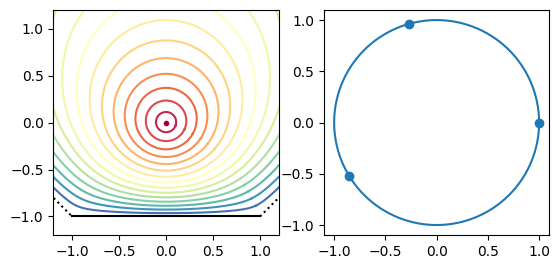

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-0.338069784522037]
 * Inf-norm of residuals: 0.000000
 * Iterations: 3
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 4
 * Jacobian Calls (df/dx): 4

In [57]:
# First official test case with infinity
poly = Polygon(SA[Inf, -1-1im], BilateralSymmetry{1}(1im), Dict(2 => 0.25))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.w[1] = Inf + 0.0im
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 2, Int64[], [2])


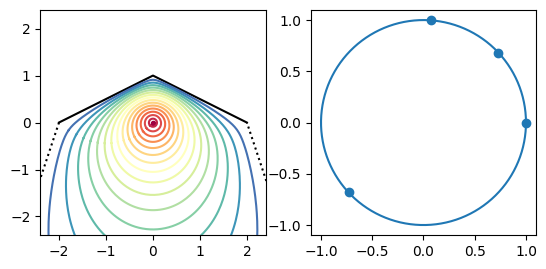

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-1.157675966076152]
 * Inf-norm of residuals: 0.000000
 * Iterations: 14
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 15
 * Jacobian Calls (df/dx): 15

In [58]:
poly = Polygon(SA[1im, -2, Inf], BilateralSymmetry{2}(1im), Dict(2 => 0.25))
poly = circshift_poly(poly, 2)
@show poly.w[1]
# poly_nosym = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(0, 2, [3], Int64[])


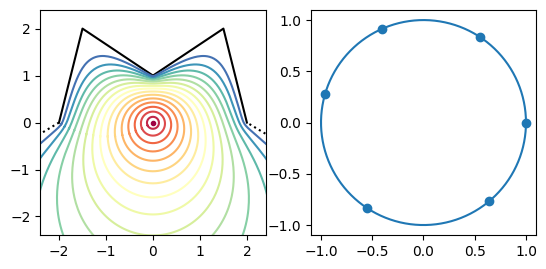

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [0.12627175548979422, -0.37925230443118557]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [59]:
poly = Polygon(SA[1im, -1.5+2im, -2, Inf], BilateralSymmetry{2}(1im), Dict(3 => -0.25))
poly = circshift_poly(poly, 3)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

In [23]:
test = SA[1, 2, Inf, 3, Inf, 4, Inf, 5]
SchwarzChristoffelDisk.findall_circ(isinf, test, 14)

3-element Vector{Int64}:
 7
 3
 5

### CyclicSymmetry with infinities

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 1, [2], [4])


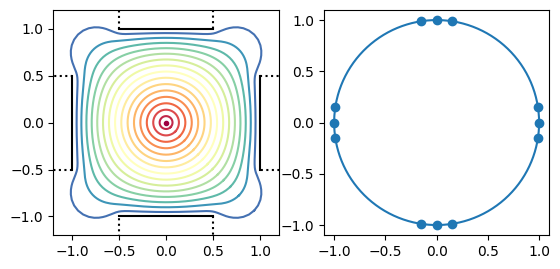

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-2.1355820405236843, 2.1355820405481847, -7.417474402201517e-12]
 * Inf-norm of residuals: 0.000000
 * Iterations: 10
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 11
 * Jacobian Calls (df/dx): 10

In [68]:
poly = Polygon(SA[1-0.5im, 1+0.5im, Inf], CyclicSymmetry{4}(), Dict(1 => -0.5, 2 => -0.5))

res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(2, [3], [5, 6])


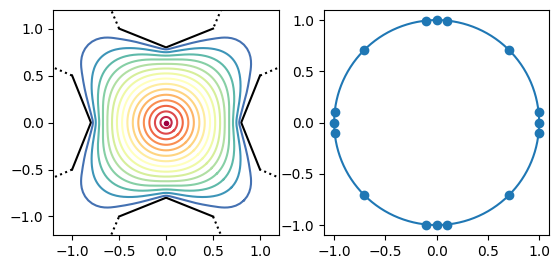

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.9346697798011754, 8.004825646962854e-7, 1.934670792840141, -1.8135215363853912e-6]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [98]:
poly = Polygon(SA[1-0.5im, 0.8, 1+0.5im, Inf], CyclicSymmetry{4}(), Dict(1 => -0.25, 3 => -0.25))

res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 3}(3, [4], [4, 5, 8])


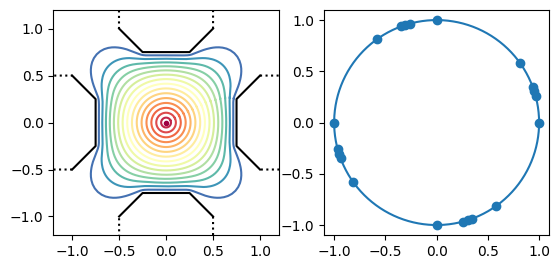

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [1.740571150925808, 4.459945861944681e-6, -1.7405714719882919, -1.2859703544654277, 1.2859662155820446]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [100]:
poly = Polygon(SA[1-0.5im, 0.75-0.25im, 0.75+0.25im, 1+0.5im, Inf], CyclicSymmetry{4}(), Dict(1 => -0.25, 4 => -0.25))
poly = circshift_poly(poly, 17)  # fails with 3, 8, 13, 18
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(4, [5], [1])


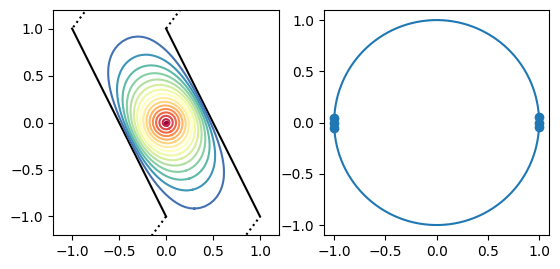

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-3.979183506699185, 4.296499842241922, -0.3173163355922794]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 8

In [101]:
poly = Polygon(SA[1im, Inf, -1+1im], CyclicSymmetry{2}(), Dict(1 => -ϕ, 3 => ϕ))
poly = circshift_poly(poly, 1)  # fails with 2 but that's a solver issue
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res


### NoSymmetry with >1 infinities

poly.s = NoSymmetry()
idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(4, [5, 1], [1])


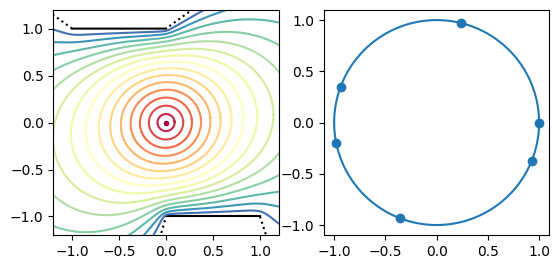

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.09435291635110568, 0.9483539339658188, -0.5770386054569107, -0.433472449184964, 1.4038753454036366]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [110]:
# works with ProblemIndices{2, 1}(4, [5, 1], [1])

poly = Polygon(
    SA[1.0im, complex(-1,1), -Inf, -1im, complex(1,-1), Inf], 
    Dict(1 => -0.2, 2 => -0.2, 4 => -0.41, 5 => -0.4, 6 => 1.6),
)
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = NoSymmetry()
idxs = SchwarzChristoffelDisk.ProblemIndices{2, 4}(4, [5, 1], [5, 6, 7, 1])


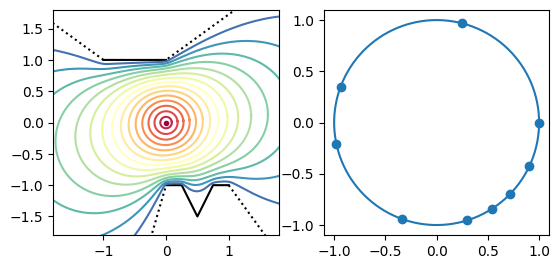

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.10357604476881631, 0.9469045725369815, -0.5847764271008388, 0.4539245684256116, 0.8822076139305679, 0.1724156697609917, -0.392490746437765, -0.27106672225189504]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [109]:
poly = Polygon(
    SA[1.0im, complex(-1,1), -Inf, -1im, 0.25-1im, 0.5-1.5im, 0.75-1im, complex(1,-1), Inf], 
    Dict(1 => -0.2, 2 => -0.2, 4 => -0.41, 8 => -0.3, 9 => 1.5),
)
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

# fig, ax = subplots()
# draw_polygon(poly, ax)

### DihedralSymmetry with >1 infinities

#### P=0

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 1, [3], [3])


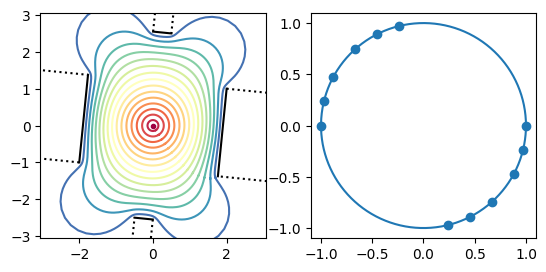

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [2.030585116612954, -0.07788707783103334, -0.2921955876082255]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [291]:
# works with ProblemIndices{1, 1}(1, [3], [3]) and ProblemIndices{1, 1}(4, [6], [6])
# not with ProblemIndices{1, 1}(3, [1], [3])
# that's one fixed point from each independent segment
poly = Polygon(
    SA[2+1im, Inf, 0.5+2.5im],
    DihedralSymmetry{2,0}(0.1+1im),
    Dict(1 => -0.5, 3 => -0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 3}(0, 3, [5, 7], [1, 2, 7])


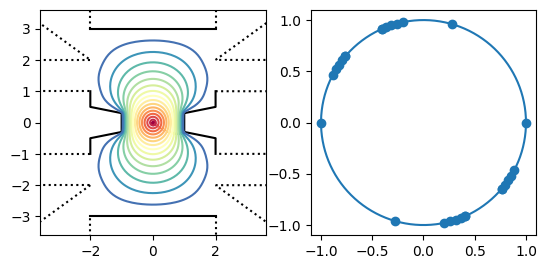

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [0.9871725751657277, 1.9461685713847048, 0.27628779114135094, -0.0006492864186334609, 0.08768493732388784, 2.476147835547111, -4.707834421251441]
 * Inf-norm of residuals: 0.000000
 * Iterations: 7
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 8

In [292]:
poly = Polygon(
    SA[1+0.3im, 2+0.5im, 2+1im, Inf, 2+2im, Inf, 2+3im],
    DihedralSymmetry{2,0}(1im),
    Dict(3 => -0.5, 4 => 1, 5 => -0.8, 6=>1.3, 7 => -0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 2, [4], [1, 4])


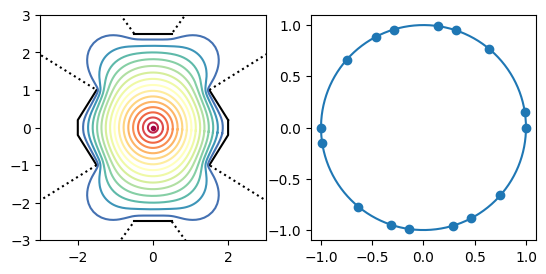

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.5341647046723388, 0.6831700288325259, 0.686898514553967, -0.8617060570363735]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [293]:
# works with ProblemIndices{1, 2}(1, [4   ], [1, 4]) 
# works with ProblemIndices{1, 2}(5, [7   ], [7, 8])
# works with ProblemIndices{2, 0}(1, [2, 4], [])
#   not with ProblemIndices{1, 2}(4, [1   ], [4, 1])
#   not with ProblemIndices{2, 0}(4, [5, 7], [])
poly = Polygon(
    SA[2+0.2im, 1.5+1im, Inf, 0.5+2.5im],
    DihedralSymmetry{2,0}(1im),
    Dict(2 => -0.5, 4 => -0.3),
)
# poly = circshift_poly(poly, 0)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 3}(0, 2, [4], [1, 4, 5])


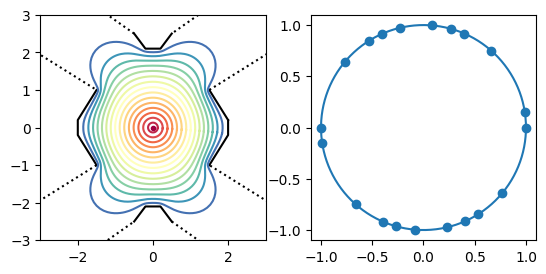

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.5238773167533441, 0.7911014822654305, 0.8125751345321883, -0.30193707816688403, -0.4945659699935088]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [294]:
poly = Polygon(
    SA[2+0.2im, 1.5+1im, Inf, 0.5+2.5im, 0.2+2.1im],
    DihedralSymmetry{2,0}(1im),
    Dict(2 => -0.5, 4 => 0.1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

#### P=1

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(1, 4, Int64[], [3])


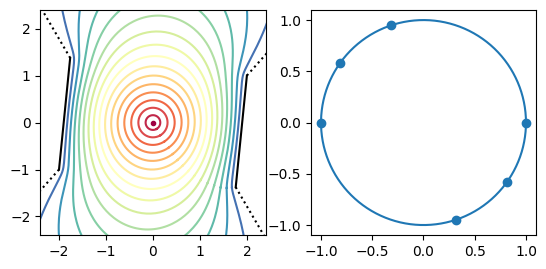

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-1.115268733366281]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [295]:
# works with ProblemIndices{0,1}(1, 3, [], [3])
poly = Polygon(
    SA[2+1im, Inf],
    DihedralSymmetry{2,1}(0.1+1im),
    Dict(1 => -0.2),
)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 2}(2, 7, Int64[], [4, 5])


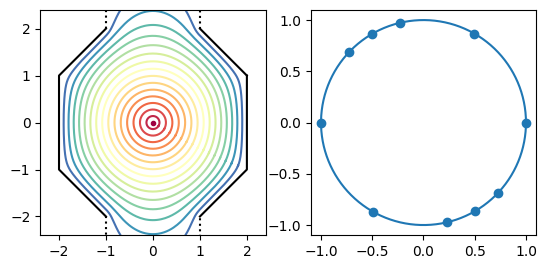

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [-0.958989251911276, -0.3309445176305599]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [296]:
# works with ProblemIndices{0,2}(2, 4, [], [4, 5])
poly = Polygon(
    SA[2+1im, 1+2im, Inf],
    DihedralSymmetry{2,1}(1im),
    Dict(2 => -0.25),
)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(2, 3, [5], Int64[])


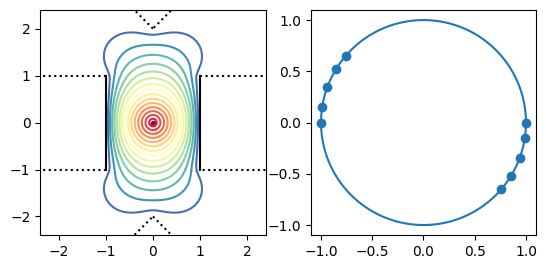

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [0.2649898452428465, -2.764183229655074]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [297]:
# ProblemIndices{1, 0}(2, 3, [5], Int64[])
poly = Polygon(
    SA[1+1im, Inf, 2im],
    DihedralSymmetry{2,1}(1im),
    Dict(1 => -0.5, 3=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(3, 4, [6], [6])


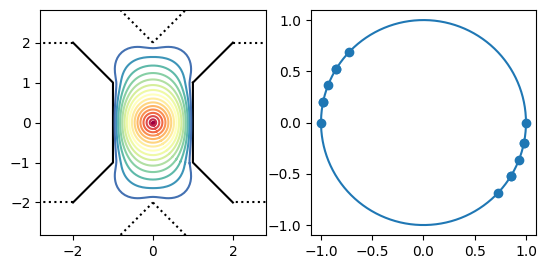

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [3.6031189334976537, -3.762389404873981, -2.475994569283229]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 8

In [298]:
# ProblemIndices{1, 1}(3, 4, [6], [6])
poly = Polygon(
    SA[1+1im, 2+2im, Inf, 2im],
    DihedralSymmetry{2,1}(1im),
    Dict(2 => -0.25, 4=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(4, 6, [8], [5, 8])


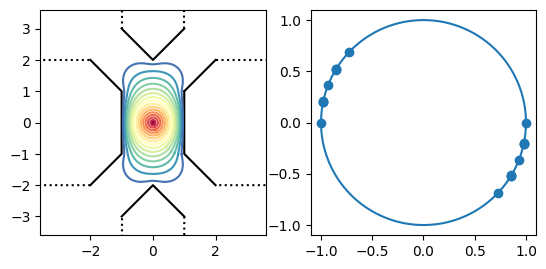

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [3.3971834869739643, -0.007693969353263124, -3.5898049146151836, -2.474692940148955]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [299]:
# ProblemIndices{1, 2}(4, 5, [8], [5, 8])
poly = Polygon(
    SA[1+1im, 2+2im, Inf, 1+3im, 2im],
    DihedralSymmetry{2,1}(1im),
    Dict(2 => -0.25, 4=>-0.25),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(4, 6, [8], [8, 9])


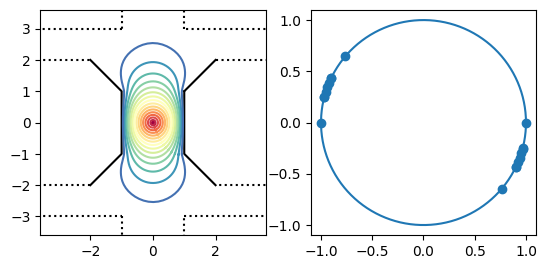

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [0.00761260221549109, 2.006035110253814, -3.6669056425594846, -2.278081468114846]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [300]:
# ProblemIndices{1, 2}(4, 6, [8], [8, 9])
poly = Polygon(
    SA[1+1im, 2+2im, Inf, 1+3im, Inf],
    DihedralSymmetry{2,1}(1im),
    Dict(2 => -0.25, 3=>1, 4=>-0.5, 5=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 3}(5, 8, [10], [7, 10, 11])


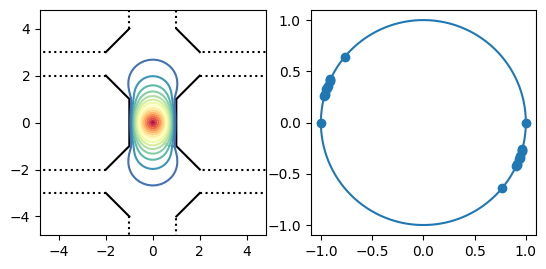

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.1153896432544508, 1.8195768325347839, -0.11494050595420185, -3.3217661460387986, -2.2334426207878817]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [301]:
# ProblemIndices{1, 3}(5, 7, [10], [7, 10, 11])
poly = Polygon(
    SA[1+1im, 2+2im, Inf, 2+3im, 1+4im, Inf],
    DihedralSymmetry{2,1}(1im),
    Dict(2 => -0.25, 3=>1, 4=>-0.25, 5=>-0.25, 6=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(3, 5, [7], [7])


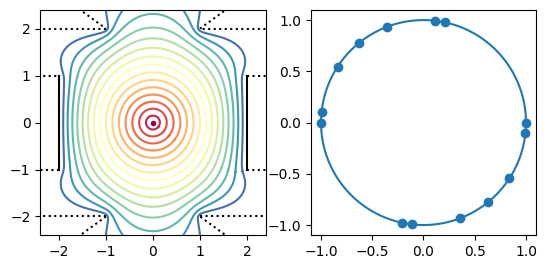

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-0.41638685137075027, 1.5338213522310884, -2.586518360409503]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [302]:
poly = Polygon(
    SA[2+1im, Inf, 1+2im, Inf],
    DihedralSymmetry{2,1}(1im),
    Dict(1 => -0.5, 2 => 1, 3 => -0.8),
)
# (fig, ax) = subplots()
# draw_polygon(poly, ax)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(5, 6, [8, 11], [8])


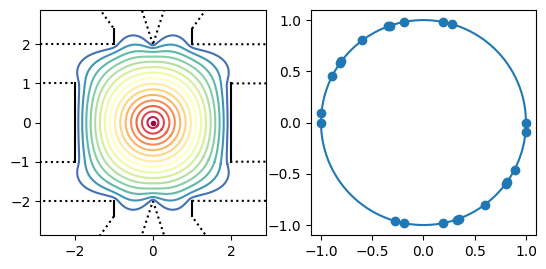

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [2.532160016980878, -1.8003673506533835, -1.0092038385824378, 1.4039500889077177, -2.615708567405704]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 8

In [303]:
poly = Polygon(
    SA[2+1im, Inf, 1+2im, 1+2.4im, Inf, 2im],
    DihedralSymmetry{2,1}(1im),
    Dict(1 => -0.5, 2 => 1, 3 => -0.5, 4 => -0.2, 5=>1.1, 6 => -0.8),
)
# (fig, ax) = subplots()
# draw_polygon(poly, ax)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(4, 7, [9], [6, 9])


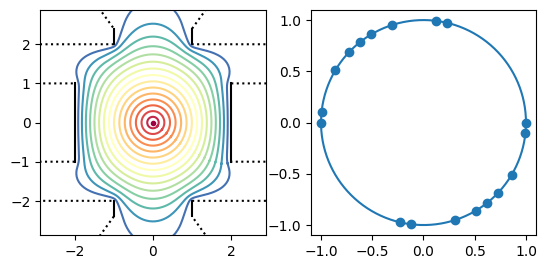

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.5015684200179652, -0.6621897686301372, 1.469490644499721, -2.593956826287465]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [304]:
# works with ProblemIndices{2,1}(6, [9], [6, 9])
poly = Polygon(
    SA[2+1im, Inf, 1+2im, 1+2.4im, Inf],
    DihedralSymmetry{2,1}(1im),
    Dict(1 => -0.5, 2 => 1, 3 => -0.5, 4 => -0.2),
)
# (fig, ax) = subplots()
# draw_polygon(poly, ax)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(4, 7, [9], [5, 6])


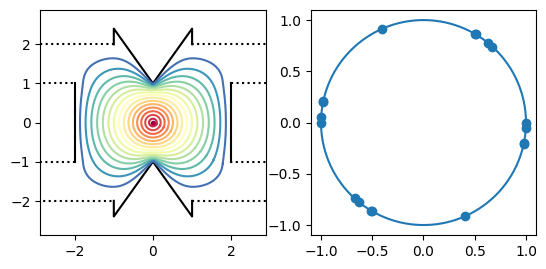

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [4.504206327022107, -2.6612664808451543, 1.0528647787423981, -2.774321527243688]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [305]:
poly = Polygon(
    SA[2+1im, Inf, 1+2im, 1+2.4im, 1im],
    DihedralSymmetry{2,1}(1im),
    Dict(1 => -0.5, 2 => 1),
)

res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 3}(5, 8, [10], [7, 10, 11])


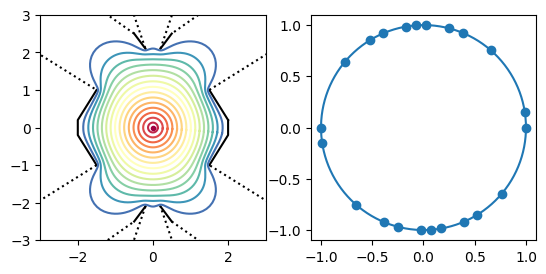

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.8360563776104284, 0.4645030439949074, -0.7936578061349977, -0.7825736026831143, 1.525305857481864]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [306]:
poly = Polygon(
    SA[2+0.2im, 1.5+1im, Inf, 0.5+2.5im, 0.2+2.1im, Inf],
    DihedralSymmetry{2,1}(1im),
    Dict(2 => -0.5, 3 => 1.0173595508115136, 4 => 0.1, 5 => -0.9, 6 => 1.209664, 7 => -0.9),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

#### P=2

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 2, Int64[], [1])


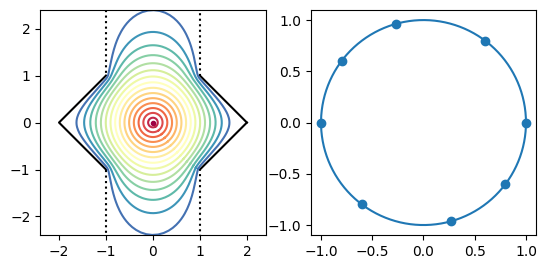

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [0.35507825480784094]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [307]:
poly = Polygon(SA[2, 1+1im, Inf], DihedralSymmetry{2,2}(1im), Dict(2 => -0.25))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 2}(0, 3, Int64[], [1, 2])


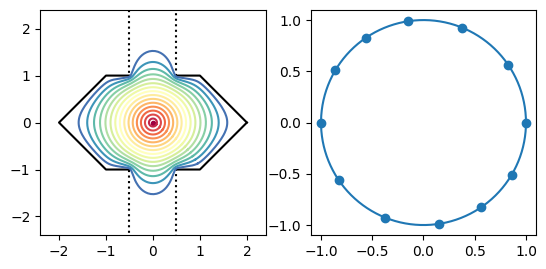

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [0.09982685208694399, 0.1999982823827283]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [308]:
poly = Polygon(SA[2, 1+1im, 0.5+1im, Inf], DihedralSymmetry{2,2}(1im), Dict(3 => -0.5))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 4, Int64[], [2])


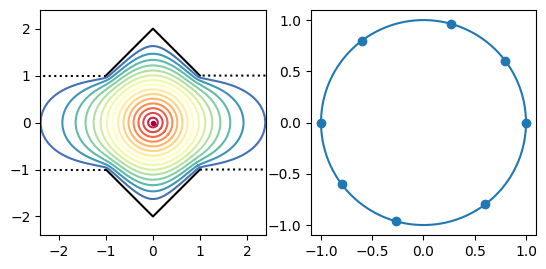

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-0.35507825480784205]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [309]:
poly = Polygon(SA[Inf, 1+1im, 2im], DihedralSymmetry{2,2}(1im), Dict(2 => -0.25))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{0, 2}(0, 6, Int64[], [2, 3])


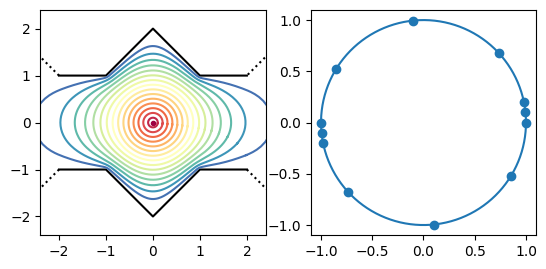

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [-1.687825662308859, -0.529205714085285]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [310]:
poly = Polygon(SA[Inf, 2+1im, 1+1im, 2im], DihedralSymmetry{2,2}(1im), Dict(2 => -0.25))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(0, 2, [3], Int64[])


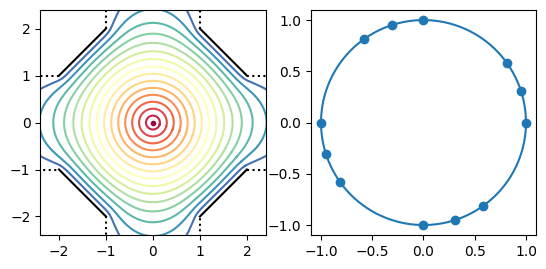

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [-1.1203322966633376, 1.1203322966578848]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [311]:
# ProblemIndices{1, 0}(0, 2, [3], Int64[])
poly = Polygon(SA[Inf, 2+1im, 1+2im, Inf], DihedralSymmetry{2,2}(1im), Dict(1 => 1, 2 => -0.25, 3 => -0.25, 4 => 1))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 2, [3], [3])


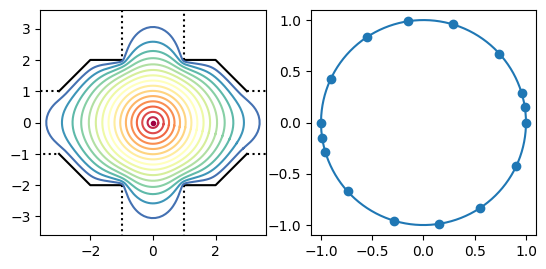

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-1.0903301554436617, -0.2064966881328004, 0.20316061844490999]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [313]:
# ProblemIndices{1,1}(0, 2, [3], [3])
poly = Polygon(SA[Inf, 3+1im, 2+2im, 1+2im, Inf], DihedralSymmetry{2,2}(1im), Dict(1 => 1, 2 => -0.25, 4 => -0.5, 5 => 1))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 1, [3], [3])


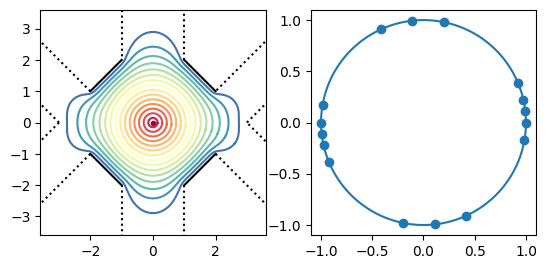

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-0.43716982993881964, -1.7290498919069894, 1.1426608025750535]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [314]:
# ProblemIndices{1,1}(0, 1, [3], [3])
poly = Polygon(SA[3, Inf, 2+1im, 1+2im, Inf], DihedralSymmetry{2,2}(1im), Dict(1 => -0.5, 2=> 1, 3=>-0.5, 4=>-0.25, 5=>1))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 1, [3], [3, 4])


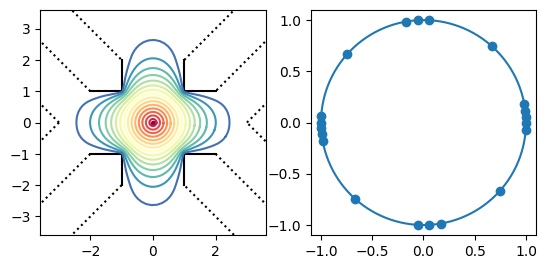

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.21567246276697574, -2.2721554177923573, -0.012050828178299562, 1.7816323584624316]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [315]:
# ProblemIndices{1, 2}(0, 1, [3], [3, 4])
poly = Polygon(SA[3, Inf, 2+1im, 1+1im, 1+2im, Inf], DihedralSymmetry{2,2}(1im), Dict(1 => -0.5, 2=> 1, 3=>-0.25, 5=>-0.25, 6=>1.5))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 1, [4], [1])


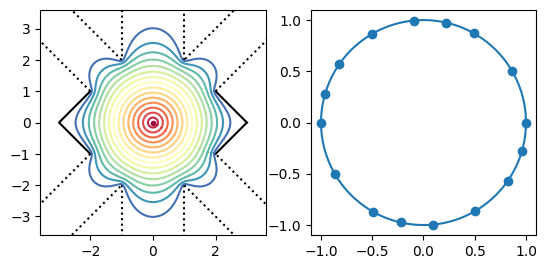

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [0.6180587049765076, -0.11287098321755938, -0.310823350393762]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [316]:
# ProblemIndices{1, 1}(0, 1, [4], [1])
poly = Polygon(SA[3, 2+1im, Inf, 1+2im, Inf], DihedralSymmetry{2,2}(1im), Dict(2 =>-0.5, 3=>1,4=>-0.75, 5=>1))
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 1, [4], [1, 4])


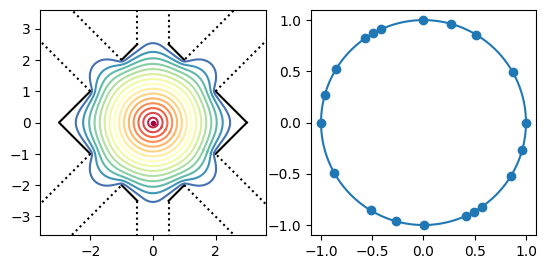

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [0.6367499757032785, -0.001781474605790887, -0.43163421021723825, 1.5247957116029738]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [317]:
# ProblemIndices{1, 2}(0, 1, [4], [1, 4])
poly = Polygon(
    SA[3, 2+1im, Inf, 1+2im, 0.5+2.5im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(2 =>-0.5, 3=>1, 4=>-0.5, 5=>-0.25, 6=>1))
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 1, [5], [1, 2])


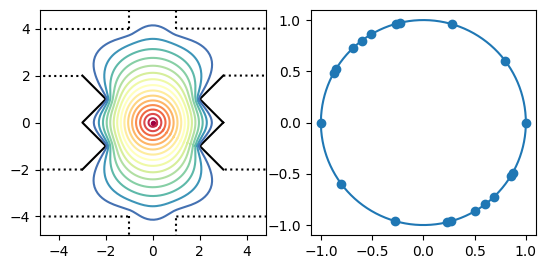

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [0.23602443715235735, 2.430315251190496, -1.7515505029596476, 0.8202291247172]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [318]:
# ProblemIndices{1, 2}(0, 1, [5], [1, 2])
poly = Polygon(
    SA[3, 2+1im, 3+2im, Inf, 1+4im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(3 => -0.25, 4=>1, 5=>-0.5, 6=>1),
)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 3}(0, 1, [5], [1, 2, 5])


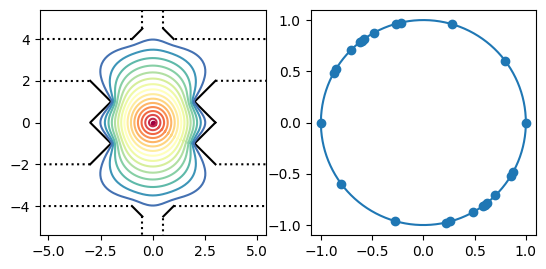

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [0.23931884114683086, 2.4376784226103334, -1.6940374219487275, 0.7729685263247515, 1.5028459270974872]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [319]:
# ProblemIndices{1, 2}(0, 1, [5], [1, 2, 5])
poly = Polygon(
    SA[3, 2+1im, 3+2im, Inf, 1+4im, 0.5+4.5im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(3 => -0.25, 4=>1, 5=>-0.25, 6=>-0.25, 7=>1),
)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 2, [4], [4])


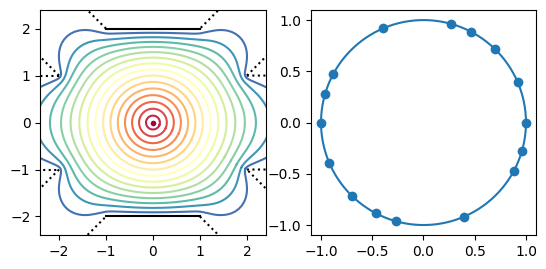

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [0.35086490524791664, 0.3040124209574757, -1.1730821087812935]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [320]:
# ProblemIndices{1, 1}(0, 2, [4], [4])
poly = Polygon(
    SA[Inf, 2+1im, Inf, 1+2im, 2im],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.75, 3=>1, 4=>-0.25),
)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 2, [4], [4, 5])


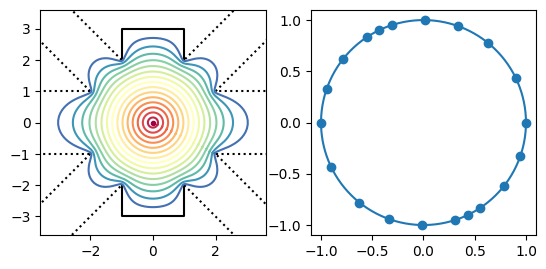

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [0.29586929129984857, 0.007723406923211867, 0.02223657060026691, 0.8633448621661378]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [321]:
# ProblemIndices{1, 2}(0, 2, [4], [4, 5])
poly = Polygon(
    SA[Inf, 2+1im, Inf, 1+2im, 1+3im, 3im],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.75, 3=>1, 4=>-0.75),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 2, [5], [2])


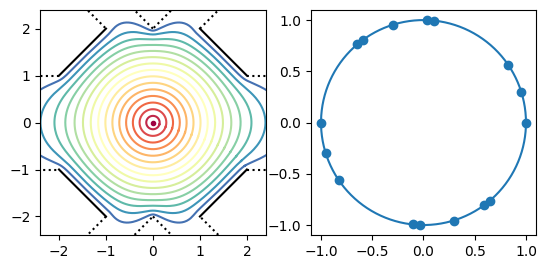

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-1.0673271635268085, 2.5487361678427924, -1.6041660273675011]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [322]:
# ProblemIndices{1, 1}(0, 2, [5], [2])
poly = Polygon(
    SA[Inf, 2+1im, 1+2im, Inf, 2im],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.25, 3=>-0.5, 4=>1, 5=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 2, [5], [2, 5])


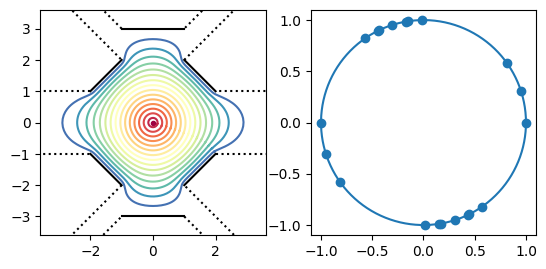

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.136982943779068, 1.9338052227752447, 2.5226675006630397, -2.540255364764548]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [323]:
# ProblemIndices{1, 1}(0, 2, [5], [2, 5])
poly = Polygon(
    SA[Inf, 2+1im, 1+2im, Inf, 1+3im, 3im],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.25, 3=>-0.5, 4=>1, 5=>-0.25),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 0}(0, 2, [4, 5], Int64[])


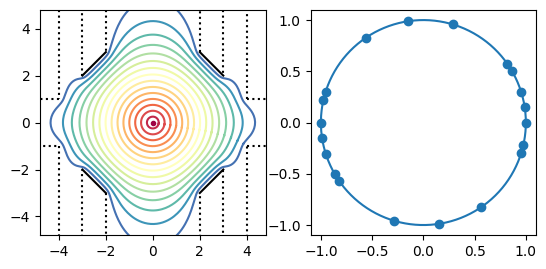

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.36762860641216866, 0.997382021387676, -2.10434479233238, 0.4174848696786145]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [324]:
# ProblemIndices{2,0}(0, 2, [4, 5], [])
poly = Polygon(
    SA[Inf, 4+1im, Inf, 3+2im, 2+3im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.5, 3=> 1, 4=>-0.75, 5=>-0.25, 6=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(0, 2, [4, 5], [5])


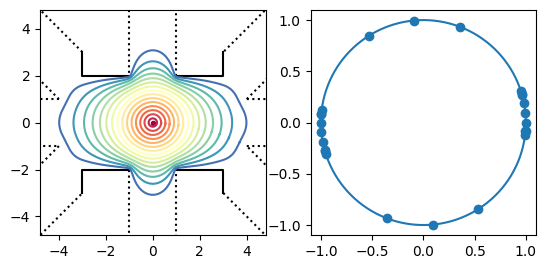

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [0.2010801062418154, 2.3657554106062584, -1.6004404901035405, -3.1895995864823754, 0.6563519528573322]
 * Inf-norm of residuals: 0.000000
 * Iterations: 7
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 8

In [325]:
# ProblemIndices{2, 1}(0, 2, [4, 5], [5])
poly = Polygon(
    SA[Inf, 4+1im, Inf, 3+3im, 3+2im, 1+2im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.75, 3=> 1, 4=>0.25, 6=>-0.5, 7=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 0}(0, 2, [5, 3], Int64[])


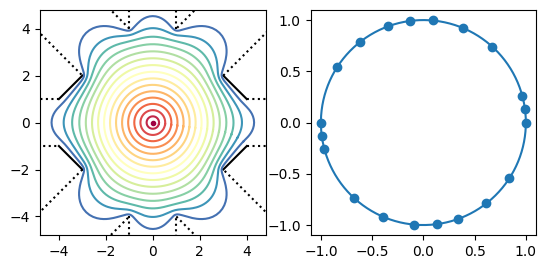

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.4891581076721028, 0.5355727041043631, 0.0750262670829038, 0.34757882203326246]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [326]:
# ProblemIndices{2, 0}(0, 2, [3, 5], Int64[])
poly = Polygon(
    SA[Inf, 4+1im, 3+2im, Inf, 1+4im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.25, 3=>-0.5, 4=>1, 5=>-0.75, 6=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(0, 2, [5, 3], [5])


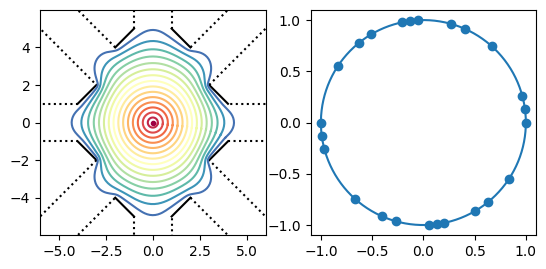

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.4899631677975853, 0.6222220505818749, 0.761869612929586, -0.806769961577408, 1.4736453391717783]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [327]:
# ProblemIndices{2, 1}(0, 2, [3, 5], [5])
poly = Polygon(
    SA[Inf, 4+1im, 3+2im, Inf, 2+4im, 1+5im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.25, 3=>-0.5, 4=>1, 5=>-0.5, 6=>-0.25, 7=>1),
)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(0, 2, [6, 3], [3])


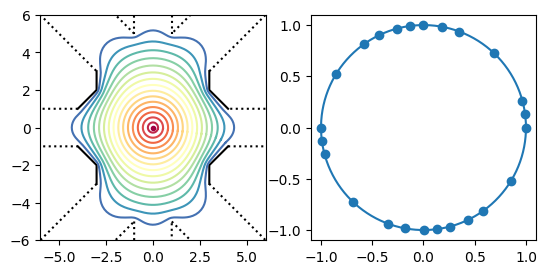

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.440301863334643, 0.3292434122757748, 0.8291655894020152, -0.05770405118261975, 0.3418350894529971]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [328]:
# ProblemIndices{2,1}(0, 2, [3, 6], [3])
poly = Polygon(
    SA[Inf, 4+1im, 3+2im, 3+3im, Inf, 1+5im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.25, 4=>-0.25, 5=>1, 6=>-0.75, 7=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 2}(0, 2, [6, 3], [3, 6])


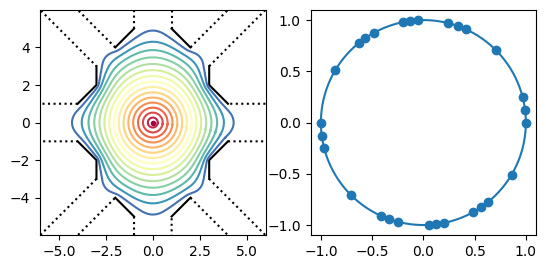

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.4319319646959887, 0.40830121395879687, 1.4775809293151572, -0.1956346267994291, -1.1258734249926337, 1.4453670282489457]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [329]:
# ProblemIndices{2,1}(0, 2, [3, 6], [3, 6])
poly = Polygon(
    SA[Inf, 4+1im, 3+2im, 3+3im, Inf, 2+4im, 1+5im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(1 => 1, 2=>-0.25, 4=>-0.25, 5=>1, 6=>-0.5, 7=>-0.25, 8=>1),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(0, 1, [3], Int64[])


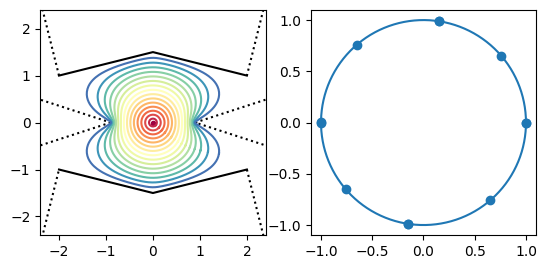

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [5.31414301443524, -5.507341756066873]
 * Inf-norm of residuals: 0.000000
 * Iterations: 9
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 10
 * Jacobian Calls (df/dx): 8

In [330]:
# ProblemIndices{2,1}(0, 1, [3], [])
poly = Polygon(
    SA[0.9, Inf, 2+1im, 1.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(1=>-0.8, 3=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 1, [3], [3])


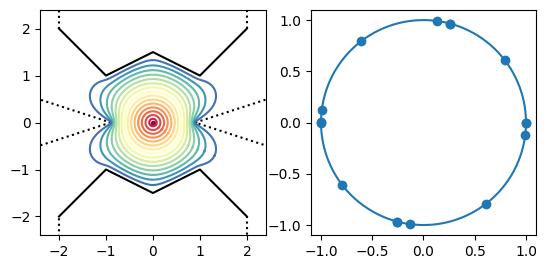

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [5.95875066531657, -4.285775825285803, -1.8625139690564405]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 8

In [331]:
# ProblemIndices{2,1}(0, 1, [3], [3])
poly = Polygon(
    SA[0.9, Inf, 2+2im, 1+1im, 1.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(1=>-0.8, 3=>-0.25),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(0, 2, [4], Int64[])


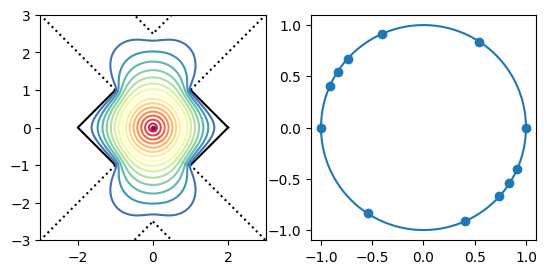

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [0.864606736215104, 0.9713866743615995]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [332]:
# ProblemIndices{1, 0}(0, 2, [4], [])
poly = Polygon(
    SA[2, 1+1im, Inf, 2.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(2=>-0.5, 4=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 1, [4], [1])


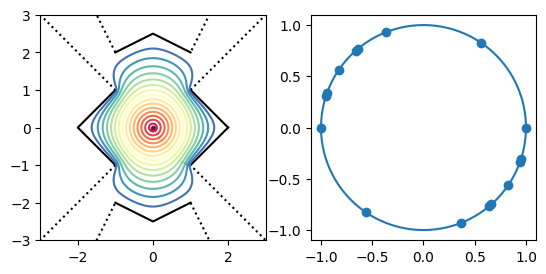

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [1.129355334499893, 2.313701728906843, -2.0877713691934305]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [333]:
# ProblemIndices{1, 1}(0, 2, [4], [1])
# ProblemIndices{1, 1}(0, 2, [4], [4])
poly = Polygon(
    SA[2, 1+1im, Inf, 1+2im, 2.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(2=>-0.5, 4=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 1}(0, 3, [5], [1])


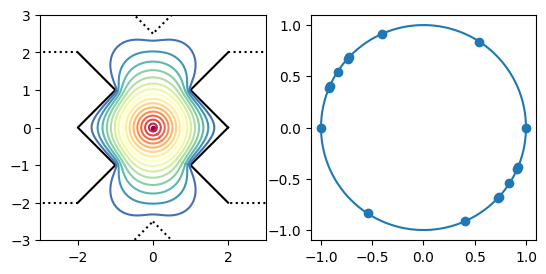

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [0.9101035520890366, 3.291672890574135, -2.388552427030334]
 * Inf-norm of residuals: 0.000000
 * Iterations: 7
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 8
 * Jacobian Calls (df/dx): 8

In [334]:
# ProblemIndices{1, 1}(0, 2, [5], [2])
poly = Polygon(
    SA[2, 1+1im, 2+2im, Inf, 2.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(3=>-0.25, 5=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 1, [5], [1, 2])


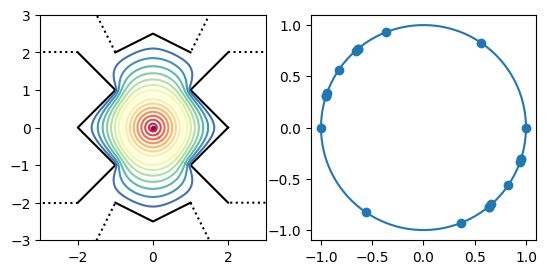

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [1.1341416191352265, 5.545106495406137, -3.2449977523132505, -2.0789771537008455]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [335]:
# ProblemIndices{1, 2}(0, 2, [5], [2,5])
poly = Polygon(
    SA[2, 1+1im, 2+2im, Inf, 1+2im, 2.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(3=>-0.25, 5=>-0.5),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

# Rest

num_free = 4
max_num_fix = 2
num_segments = 2
k_fix = [4]
k_len = [4, 7]
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 2, [4], [4, 7])


┌ Warning: parameter_problem failed
└ @ SchwarzChristoffelDisk c:\Scratch\SchwarzChristoffelDisk.jl\src\parameter_problem.jl:217


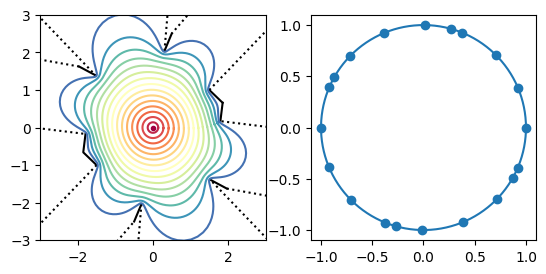

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.023733484572080223, 1.3036051569964366, -0.8564293315642574, -0.4706863052981843]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [267]:
poly = Polygon(
    SA[2, 1.5+1im, Inf, 0.5+2.5im, 0.2+2.1im, Inf],
    DihedralSymmetry{2,2}(1im),
    Dict(2 => -0.5, 3 => 1.0173595508115136, 4 => 0.1, 5 => -0.9, 6 => 1.270113663, 7 => -0.9),
)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

num_free = 2
max_num_fix = 1
num_segments = 1
k_fix = [3]
k_len = Int64[]
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(0, 2, [3], Int64[])


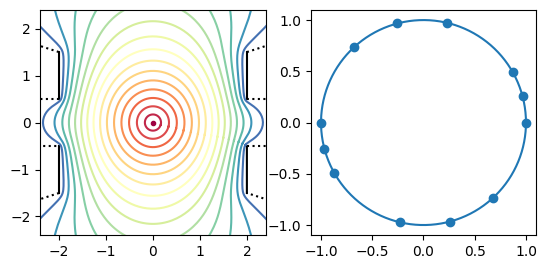

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [-1.1645715115884903, 0.5334909574615931]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [268]:
# ProblemIndices{1,0}(0, 2, [3], [])

poly = Polygon(
    SA[Inf, 2+0.5im, 2+1.5im, Inf],
    DihedralSymmetry{2,2}(2im),
    Dict(1 => 1, 2 => -0.5, 3=>-0.4)
)
poly = circshift_poly(poly, 0)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res


num_free = 1
max_num_fix = 0
num_segments = 1
k_fix = Int64[]
k_len = [4]
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(0, 2, Int64[], [4])


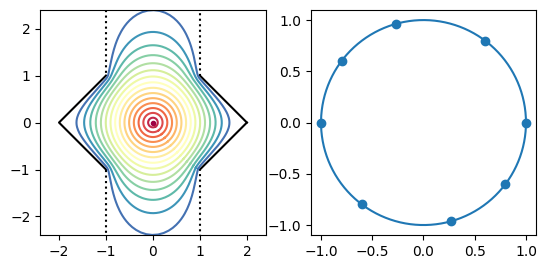

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [0.3550782548078419]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [269]:
# ProblemIndices{0, 1}(0, 2, Int64[], [4])

poly = Polygon(
    SA[2, 1+1im, Inf],
    DihedralSymmetry{2,2}(2im),
    Dict(2 => -0.25)
)
poly = circshift_poly(poly, 0)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res


num_free = 2
max_num_fix = 1
num_segments = 2
k_fix = [4]
k_len = Int64[]
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 0}(0, 2, [4], Int64[])


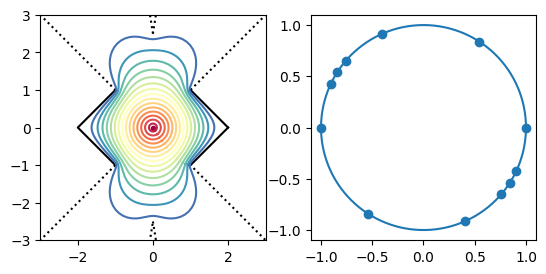

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0]
 * Zero: [0.8137352396942866, 1.1990980627030934]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [270]:
# works with ProblemIndices{1, 0}(0, 2, [4], Int64[])

poly = Polygon(
    SA[2, 1+1im, Inf, 2.5im],
    DihedralSymmetry{2,2}(1im),
    Dict(2 => -0.5, 4 => -0.9),
)
# poly = circshift_poly(poly, 0)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

num_free = 5
max_num_fix = 2
num_segments = 3
k_fix = [4, 6]
k_len = [6]
idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(0, 2, [4, 6], [6])


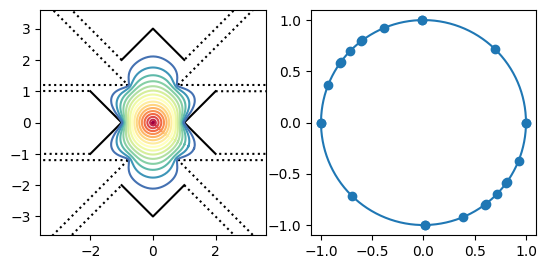

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [7.826498729845368, -7.087551766811715, 0.44677100931800195, 2.9767884223069574, -2.4422087424461436]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 9

In [271]:
poly = Polygon(
    SA[1, 2+1im, Inf, 0.8+1.2im, Inf, 1+2im, 3im],
    DihedralSymmetry{2,2}(1im),
    Dict(2 => -0.25, 3 => 1, 4 => -0.75, 5 => 1, 6 => -0.5),
)
poly = circshift_poly(poly, 0)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)

res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res


num_free = 4
max_num_fix = 2
num_segments = 2
k_fix = [5]
k_len = [2, 5]
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(0, 2, [5], [2, 5])


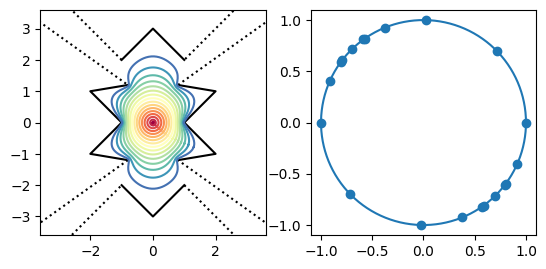

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [0.6132708856349864, 0.6403491114384972, 2.6096044680892683, -2.196215437142962]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [273]:
poly = Polygon(
    SA[1, 2+1im, 0.8+1.2im, Inf, 1+2im, 3im],
    DihedralSymmetry{2,2}(1im),
    Dict(3 => -0.75, 5 => -0.5),
)
poly = circshift_poly(poly, 0)
# poly = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)

res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res


## Others

poly.s = DihedralSymmetry{2, 1, ComplexF64}(0.979877351517712 - 0.19960054103792968im)
idxs = SchwarzChristoffelDisk.ProblemIndices{1, 2}(10, [11], [11, 12])


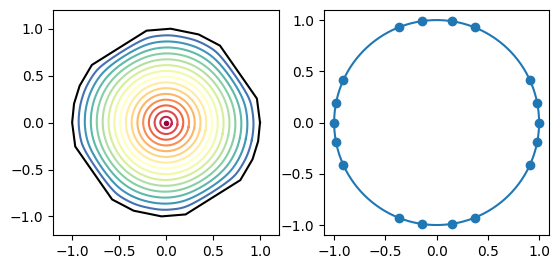

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.21223743891804842, -1.1788928071691331, 1.1919286303001466, -0.23752482182184817]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [15]:
vertices = cispi.(SchwarzChristoffelDisk.y_to_θ([-1, 1, -1/6, 1/6, -1, 1, 1/4, 0, -1/4, -1, 1, -1/6, 1/6, -1, 1, 1/4, 0]))
vertices = circshift(vertices, 1)
poly = Polygon(SVector{length(vertices)}(vertices))
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

In [185]:
SchwarzChristoffelDisk.circshift_noalloc_poplast(
    SchwarzChristoffelDisk.prevertex_params(MVector{4}(1:4), poly.s), 3)

17-element MVector{17, Int64} with indices SOneTo(17):
 -3
 -2
 -1
  1
  2
  3
  4
  0
 -4
 -3
 -2
 -1
  1
  2
  3
  4
  0

poly.s = DihedralSymmetry{2, 1, ComplexF64}(0.9716094717627946 - 0.23659043594537654im)


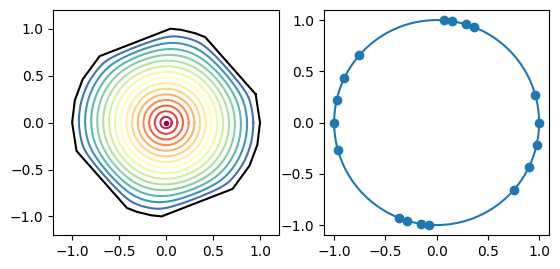

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0]
 * Zero: [-0.20306573751029164, -1.218220111500896, 2.3820482515243024, -0.45609273867074174]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [73]:
vertices = cispi.(SchwarzChristoffelDisk.y_to_θ([-1, 2, -1/3, 1/3, -2, 1, 1/4, 0, -1/4, -1, 2, -1/3, 1/3, -2, 1, 1/4, 0]))
poly = Polygon(SVector{length(vertices)}(vertices))
@show poly.s
# poly = Polygon(poly.w, BilateralSymmetry{1}(poly.s.axis), poly.β, poly.ℓ)
# poly = Polygon(poly.w, SchwarzChristoffelDisk.NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

poly.s = BilateralSymmetry{0, ComplexF64}(0.914451556131548 - 0.4046953811060738im)


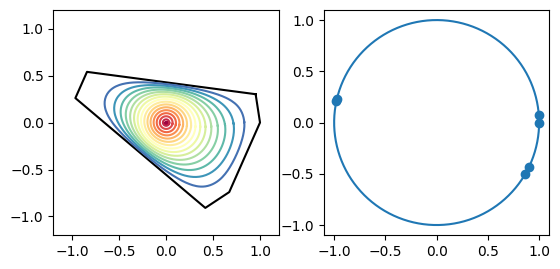

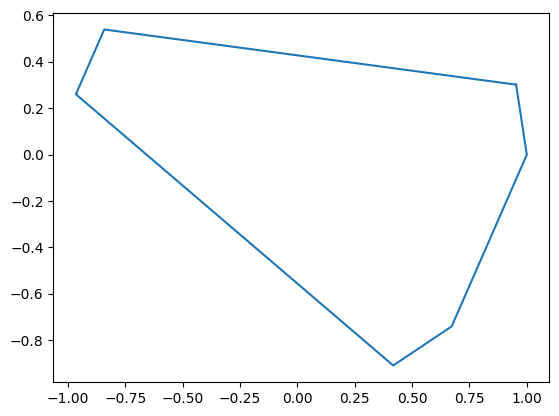

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0]
 * Zero: [-4.741710003746189, 3.609751426747255, -1.7601752018391572]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [72]:
vertices = cispi.(SchwarzChristoffelDisk.y_to_θ([-2, 2, -2, 2, -1]))
poly = Polygon(SVector{length(vertices)}(vertices))
@show poly.s
fig, ax = subplots()
draw_polygon(poly, ax)

res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

idxs = SchwarzChristoffelDisk.ProblemIndices{2, 1}(1, [2, 4], [4])


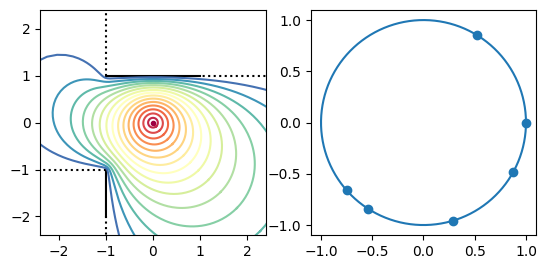

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0, 0.0, 0.0, 0.0, 0.0]
 * Zero: [-1.0273843373311995, 2.3284311330158762, -1.1358150278190327, 0.11624541197971766, 0.41412452799801164]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [55]:
poly = Polygon(SA[1+1im, -1+1im, -Inf, -(1+1im), -1-2im, Inf],
               Dict(1:5 .=> [0, -0.5, 1.5, -0.5, 0]))
# poly = Polygon(poly.w, SchwarzChristoffelDisk.NoSymmetry(), poly.β, poly.ℓ)
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "Spectral", false)
res

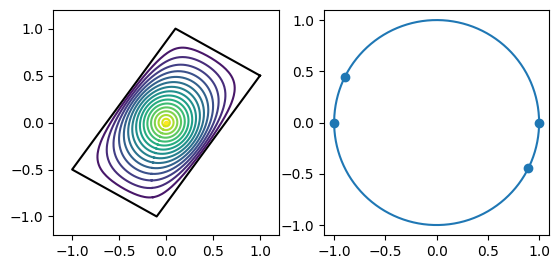

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-1.7577358385567212]
 * Inf-norm of residuals: 0.000000
 * Iterations: 4
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 5

In [71]:
poly = Polygon(SA[1.0+0.5im, 0.1+1.0im], CyclicSymmetry{2}())
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500, "viridis_r")
res

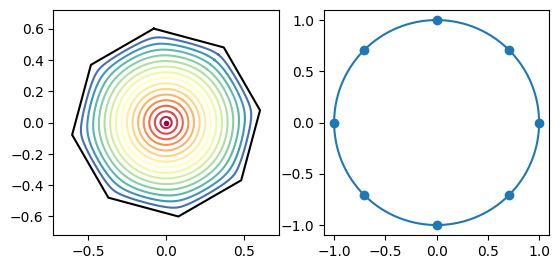

In [14]:
poly = Polygon(SA[randn(ComplexF64)], CyclicSymmetry{8}())
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500)
res

poly.s = BilateralSymmetry{2, Complex{Int64}}(-2 + 0im)


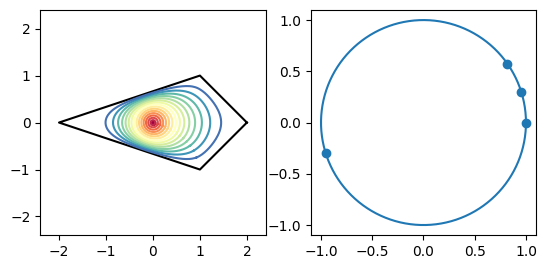

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-2.2250495031993265]
 * Inf-norm of residuals: 0.000000
 * Iterations: 6
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 7
 * Jacobian Calls (df/dx): 7

In [463]:
poly = Polygon(SA[2, 1+1im, -2, 1-1im])
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500)
res

poly.s = CyclicSymmetry{3}()


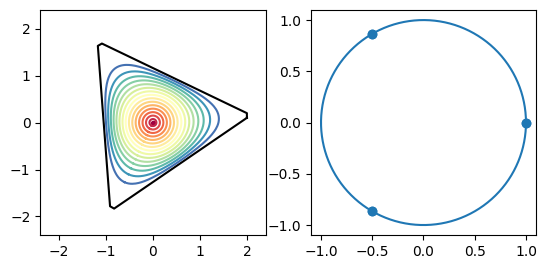

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-8.120430488726864]
 * Inf-norm of residuals: 0.000000
 * Iterations: 8
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 9
 * Jacobian Calls (df/dx): 9

In [15]:
poly = Polygon(SA[2+0.1im, 2+0.2im], CyclicSymmetry{3}())
poly_nosym = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500)
res

poly.s = CyclicSymmetry{3}()


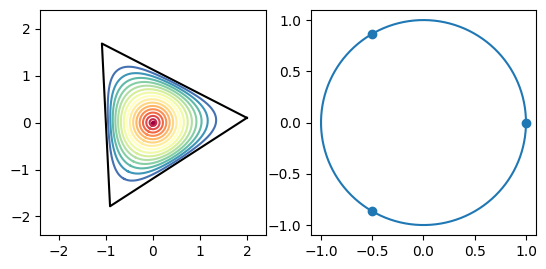

In [16]:
poly = Polygon(SA[2+0.1im], CyclicSymmetry{3}())
poly_nosym = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500)
res

poly.s = DihedralSymmetry{3, 0, ComplexF64}(2.0 + 0.0im)
idxs = SchwarzChristoffelDisk.ProblemIndices{0, 1}(2, Int64[], [2])


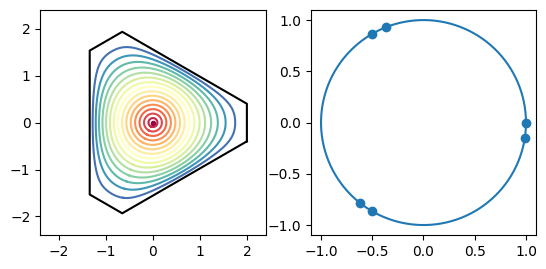

Results of Nonlinear Solver Algorithm
 * Algorithm: Trust-region with dogleg and autoscaling
 * Starting Point: [0.0]
 * Zero: [-2.561060123958685]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-10: true
 * Function Calls (f): 6
 * Jacobian Calls (df/dx): 6

In [45]:
poly = Polygon(SA[2-0.4im], DihedralSymmetry{3,0}(2.0+0im))
# poly_nosym = Polygon(poly.w, NoSymmetry(), poly.β, poly.ℓ)
@show poly.s
res, scderiv = sc_parameter_problem(poly)
sc_plot(scderiv, 15, 500)
res